In [1]:
startSwank 4009

Checking SLIME_HOME
About to start swank server
Started swank server


T

In [3]:
help

Help is available on the following subjects: 
add                     addAtomTypes            addH                    addIons                 
addIons2                addIonsRand             addPath                 addPdbAtomMap           
addPdbResMap            alignAxes               assignAtomTypes         bond                    
bondByDistance          cando                   center                  charge                  
compileSmarts           copy                    createAtom              createResidue           
createUnit              deSelect                deleteBond              desc                    
dir                     easyGaff                help                    jostleAtoms             
leapCommandsAvailable   leapCommandsMissing     list                    listForceFields         
listVariables           loadAmberParams         loadChemDraw            loadChemDrawAggregate   
loadMoe                 loadMol2                loadOff                 loadPdb  

NIL

In [4]:
quickload "membrane-packer"

To load "membrane-packer":
  Load 1 ASDF system:
    membrane-packer

; Loading "membrane-packer"



("membrane-packer")

In [5]:
(membrane-packer::setup-system-membrane-force-field)

#<FORCE-FIELD >

In [6]:
(list-force-fields)

:DEFAULT (#<FORCE-FIELD >)
:SYSTEM-MEMBRANE (#<FORCE-FIELD >)


NIL

In [7]:
setupAmberPaths

(#P"/Users/meister/Development/amber18/dat/antechamber/"
 #P"/Users/meister/Development/amber18/dat/leap/cmd/"
 #P"/Users/meister/Development/amber18/dat/leap/parm/"
 #P"/Users/meister/Development/amber18/dat/leap/lib/"
 #P"/Users/meister/Development/amber18/dat/leap/prep/")

In [8]:
source "leaprc.protein.ff14SB"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/parm10.dat" file-pos 56064>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/parm10.dat" file-pos 56146>
Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT


T

In [9]:
source "leaprc.lipid14"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/lipid14.dat" file-pos 19299>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/lipid14.dat" file-pos 19407>
Adding force field lipid14.dat to DEFAULT


T

In [10]:
source "leaprc.water.tip3p"

Adding force field frcmod.tip3p to DEFAULT
Adding force field frcmod.ionsjc_tip3p to DEFAULT
Adding force field frcmod.ions234lm_126_tip3p to DEFAULT


T

In [11]:
source "leaprc.gaff"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/gaff.dat" file-pos 477637>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/gaff.dat" file-pos 477719>
Adding force field gaff.dat to DEFAULT


T

In [12]:
prot = loadMoe /Users/meister/Development/cando-dev/extensions/cando/src/lisp/membrane-packer/data/merck_suvorexant_derivatives.moe

#<AGGREGATE NIL 0>

In [13]:
show prot

#<NGLV:NGLWIDGET>

In [14]:
ligands = (loop for index from 3 to 20 collect (removeMatter prot (molid prot index)))

(#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>)

In [15]:
desc ligands

Describing (#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>)


(#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>) - cons


NIL

Missing-h NIL


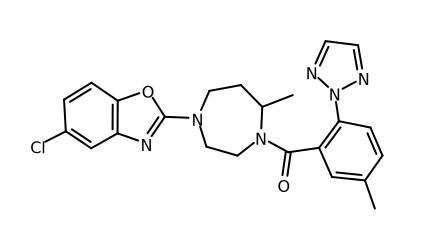

In [17]:
show (sketch2d:sketch2d (first ligands))

In [18]:
desc prot

Describing #<AGGREGATE NIL 0>


#<MOLECULE NIL 1> 3356 atoms
#<MOLECULE NIL 2> 1479 atoms



NIL

In [19]:
set prot/1.1 name :NPRO
set prot/1.205 name :CGLN
set prot/2.206 name :NLYS
set prot/2.293 name :CCYS

setting #<RESIDUE :PRO 1>  property: :NAME  value: :NPRO
setting #<RESIDUE :GLN 205>  property: :NAME  value: :CGLN
setting #<RESIDUE :LYS 206>  property: :NAME  value: :NLYS
setting #<RESIDUE :CYS 293>  property: :NAME  value: :CCYS


NIL

In [20]:
assignAtomTypes prot

Assigned 4835 types of a total of 4835 atoms.


NIL

In [21]:
(move-geometric-center-to-origin prot)

NIL

In [22]:
(show prot :axes t)

#<NGLV:NGLWIDGET>

# Test the math

In [23]:
(membrane-packer::setup-system-membrane-force-field)

#<FORCE-FIELD >

In [24]:
tagg = (chem:make-aggregate)
tmol1 = (chem:make-molecule :mol1)
tmol2 = (chem:make-molecule :mol2)
tres1 = (chem:make-residue :res1)
tres2 = (chem:make-residue :res2)
tatm1 = (chem:make-atom :c1 :c)
tatm2 = (chem:make-atom :c2 :c)
bb = (chem:make-bounding-box '(40 40 40))
(chem:set-position tatm1 (geom:vec 17.0 0 0))
(chem:set-position tatm2 (geom:vec -17.0 0 0))
(chem:set-type tatm1 :lipid0)
(chem:set-type tatm2 :lipid0)
(chem:add-matter tres1 tatm1)
(chem:add-matter tmol1 tres1)
(chem:add-matter tres2 tatm2)
(chem:add-matter tmol2 tres2)
(chem:add-matter tagg tmol1)
(chem:add-matter tagg tmol2)
(chem:setf-force-field-name tmol1 :system-membrane)
(chem:setf-force-field-name tmol2 :system-membrane)
(chem:aggregate-set-bounding-box tagg bb)                            

#<AGGREGATE NIL 0>

In [25]:
(show tagg :axes nil)

#<NGLV:NGLWIDGET>

In [26]:
energy = (membrane-packer::build-simple-aggregate-energy-function tagg)

atom-table -> #<ATOM-TABLE >
First atom: #<ATOM :C1/:C 0>


#<ENERGY-FUNCTION >

In [27]:
(membrane-packer::show-well tagg energy)

34.0d0 1412.8562404406994d0


NIL

In [28]:
(multiple-value-list (chem:calculate-energy-and-force energy))

(1412.8562404406994d0
 #(-2862.7473885354484d0 0.0d0 0.0d0 2862.7473885354484d0 0.0d0 0.0d0)
 #(17.0d0 0.0d0 0.0d0 -17.0d0 0.0d0 0.0d0))

In [29]:
(energy:minimize-energy-function energy :sd-tolerance 0.1 :frozen #*011011)

minimize-no-fail
======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minSDnP       0     2     -6.80   0.0             -0.147              0.000
 ! DONE absolute force test:
 ! forceRmsMag(1.041551e-09) < forceTolerance(1.000000e-01)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-log(Alpha)--Prev.dir--------Energy-----------RMSforce
 minCGnP       0     2      -inf  90.0             -0.147              0.000
 ! DONE absolute force test:
 ! forceRmsMag(0.000000)<forceTolerance(0.500000)
======= Skipping Truncated Newton #steps = 0
======= All three minimizers have completed or passed on minimization.
Just returned from minimize


#<ENERGY-FUNCTION >

In [30]:
show tagg

#<NGLV:NGLWIDGET>

In [31]:
(membrane-packer::show-well tagg energy)

27.600288392365307d0 -0.1465551061763491d0


NIL

In [32]:
(loop for i from 2 below 16 by 0.1 do (membrane-packer::show-well tagg energy i))

11.800144196182654d0 -0.11787879301071935d0
11.700144291550085d0 -0.105014003536744d0
11.600144386917517d0 -0.08875450702945664d0
11.500144482284949d0 -0.06854910034181305d0
11.40014457765238d0 -0.04376198932048314d0
11.300144673019812d0 -0.01365952101915835d0
11.200144768387243d0 0.022605262673953685d0
11.100144863754675d0 0.06601062763181875d0
11.000144959122107d0 0.11768715322566037d0
10.900145054489538d0 0.17894227085700665d0
10.80014514985697d0 0.25128896389169164d0
10.700145245224402d0 0.33647937613743395d0
10.600145340591833d0 0.4365442182224527d0
10.500145435959265d0 0.5538390321366452d0
10.400145531326697d0 0.6910985799151023d0
10.300145626694128d0 0.8515008704847066d0
10.20014572206156d0 1.0387426382788592d0
10.100145817428992d0 1.25712844969769d0
10.000145912796423d0 1.5116760528365734d0
9.900146008163855d0 1.8082411193994292d0
9.800146103531286d0 2.1536651767361565d0
9.700146198898718d0 2.5559513190153016d0
9.60014629426615d0 3.024473252623958d0
9.500146389633581d0 3.570224

NIL

In [30]:
(membrane-packer::show-well tagg energy 5.0)

8.800144196182654d0 10.985326307497077d0


NIL

In [33]:
dynsimple = (membrane-packer::simulate-simple-membrane-energy-function energy (chem:bounding-box tagg) #*111001 500000)

#<DYNAMICS:SIMULATION>

In [34]:
show dynsimple

#<NGLV:NGLWIDGET>

In [33]:
(membrane-packer::look-for-close-contacts dynsimple 0)

((8.80014419555664d0 #<ATOM :C1/:C 0> #<ATOM :C2/:C 0>))

In [34]:
(membrane-packer::look-for-close-contacts dynsimple nil)

((12.400000095367432d0 #<ATOM :C1/:C 0> #<ATOM :C2/:C 0>))

In [35]:
(show tagg :axes t)

#<NGLV:NGLWIDGET>

# Test a bunch of points

In [47]:
agg = (membrane-packer::random-aggregate 30)

(#<AGGREGATE NIL 0>)

In [43]:
show agg

#<NGLV:NGLWIDGET>

In [44]:
energy = (membrane-packer::build-simple-aggregate-energy-function agg)

atom-table -> #<ATOM-TABLE >
First atom: #<ATOM :L0/:Ar 0>


#<ENERGY-FUNCTION >

In [45]:
(let ((chem::*verbose* 0)) (energy:minimize-energy-function energy :sd-tolerance 0.1))

minimize-no-fail
======= Starting Steepest Descent Minimizer
 minSDnP       0    10    -21.27   0.0      436472710.468 2058123684756636.500
 minSDnP       0    20    -14.94   0.0        4247898.802    46394465206.149
 minSDnP       0    30    -11.24   0.0         209493.483       29769260.452
 minSDnP       0    40     -9.98   0.0          93901.284        1993340.491
 minSDnP       0    50     -9.12   0.0          56269.114         371005.020
 minSDnP       0    60     -8.66   0.0          44709.646          42413.521
 minSDnP       0    70     -8.70   0.0          41846.416          28806.586
 minSDnP       0    80     -8.71   0.0          39890.970          18108.159
 minSDnP       0    90     -8.70   0.0          38695.489          11416.861
 minSDnP       0   100     -8.66   0.0          37873.728           8423.382
 minSDnP       0   110     -8.58   0.0          37204.552           6402.891
 minSDnP       0   120     -8.49   0.0          36701.858           3807.120
 minSDnP     

#<ENERGY-FUNCTION >

In [46]:
show agg

#<NGLV:NGLWIDGET>

In [41]:
dynsimple = (membrane-packer::setup-simple-membrane-dynamics energy (chem:bounding-box agg))

#<DYNAMICS:SIMULATION>

In [116]:
(membrane-packer::advance-simple-membrane-dynamics dynsimple (chem:bounding-box agg) nil)

#<DYNAMICS:SIMULATION>

In [117]:
(dotimes (i 1000) (membrane-packer::advance-simple-membrane-dynamics dynsimple (chem:bounding-box agg) nil))

NIL

In [118]:
show dynsimple

#<NGLV:NGLWIDGET>

In [119]:
(membrane-packer::look-for-close-contacts dynsimple 0)

((6.329726762565862d0 #<ATOM :L0/:Ar 0> #<ATOM :L4/:Ar 0>)
 (6.437013882957715d0 #<ATOM :L1/:Ar 0> #<ATOM :L4/:Ar 0>)
 (6.555888032440254d0 #<ATOM :L0/:Ar 0> #<ATOM :L3/:Ar 0>)
 (6.720909345981038d0 #<ATOM :L3/:Ar 0> #<ATOM :L4/:Ar 0>)
 (6.84416634160265d0 #<ATOM :L2/:Ar 0> #<ATOM :L4/:Ar 0>)
 (7.230563611881231d0 #<ATOM :L2/:Ar 0> #<ATOM :L3/:Ar 0>)
 (7.965505961110309d0 #<ATOM :L1/:Ar 0> #<ATOM :L2/:Ar 0>)
 (11.081694670116443d0 #<ATOM :L0/:Ar 0> #<ATOM :L2/:Ar 0>)
 (12.040800322555187d0 #<ATOM :L0/:Ar 0> #<ATOM :L1/:Ar 0>)
 (12.269249305391071d0 #<ATOM :L1/:Ar 0> #<ATOM :L3/:Ar 0>))

In [105]:
(membrane-packer::look-for-close-contacts dynsimple nil)

((126798.26447726853d0 #<ATOM :L2/:Ar 0> #<ATOM :L3/:Ar 0>)
 (127391.04990818167d0 #<ATOM :L3/:Ar 0> #<ATOM :L4/:Ar 0>)
 (234716.9555875904d0 #<ATOM :L2/:Ar 0> #<ATOM :L4/:Ar 0>)
 (365313.47846391576d0 #<ATOM :L0/:Ar 0> #<ATOM :L4/:Ar 0>)
 (427663.1023221231d0 #<ATOM :L1/:Ar 0> #<ATOM :L2/:Ar 0>)
 (488420.52430965146d0 #<ATOM :L0/:Ar 0> #<ATOM :L3/:Ar 0>)
 (489509.5871160772d0 #<ATOM :L1/:Ar 0> #<ATOM :L3/:Ar 0>)
 (575861.7557208302d0 #<ATOM :L0/:Ar 0> #<ATOM :L2/:Ar 0>)
 (614419.5225638946d0 #<ATOM :L1/:Ar 0> #<ATOM :L4/:Ar 0>)
 (977476.6528285601d0 #<ATOM :L0/:Ar 0> #<ATOM :L1/:Ar 0>))

In [93]:
(dynamics:forces dynsimple)

#(2.7645933891505745d0 -2.1153348492569433d0 -1.4971422935097403d0
  -1.8360400901957836d0 -1.4408459331718266d0 1.6912367079927138d0
  -2.8877136066464333d0 3.4528572617111224d0 -0.7915984547793495d0
  0.22184844900016584d0 -0.7177186623173721d0 2.2007652241830415d0
  1.7373118586914769d0 0.8210421830350194d0 -1.6032611838866657d0)

In [94]:
(dynamics:velocity dynsimple)

#(0.005229234041766717d0 -0.009787154770396786d0 -0.006921395301787093d0
  -0.004782722663177649d0 -0.006659858057915109d0 0.007814443108999636d0
  -0.008958948106609318d0 0.015958675922827455d0 -0.003654531049618944d0
  4.349209889527887d-4 -0.0033052299257128187d0 0.002355932139153868d0
  0.008077515739067464d0 0.0037935668311972616d0 4.055511032525332d-4)

In [95]:
(dynamics:delta-t-over-mass dynsimple)

#(5.120176423195188d-4 5.120176423195188d-4 5.120176423195188d-4
  5.120176423195188d-4 5.120176423195188d-4)

In [207]:
dynsimple = (membrane-packer::simulate-simple-membrane-energy-function 
             energy 
             (chem:bounding-box agg) nil 1000)

#<DYNAMICS:SIMULATION>

# Regular membrane packing

In [ ]:
memb = (membrane-packer:build-ga-membrane prot)

In [69]:
aggtop = (membrane-packer::build-simple-membrane-aggregate memb 10 :top)

#<AGGREGATE NIL 0>

In [70]:
show aggtop

#<NGLV:NGLWIDGET>

In [71]:
ef-frozen = (multiple-value-list (membrane-packer::build-simple-membrane-energy-function memb 10 :top))

atom-table -> #<ATOM-TABLE >
First atom: #<ATOM :HA/:H 0>


(#<ENERGY-FUNCTION >
 #*1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [72]:
ef = (first ef-frozen)

#<ENERGY-FUNCTION >

In [73]:
(chem:enable-debug ef)

NIL

In [74]:
(chem:calculate-energy-and-force ef)

1.822607109917903d7

In [66]:
dyn = (membrane-packer::simulate-simple-membrane memb 500)

atom-table -> #<ATOM-TABLE >
First atom: #<ATOM :HA/:H 0>


#<DYNAMICS:SIMULATION>

In [67]:
show dyn

#<NGLV:NGLWIDGET>

In [41]:
(chem:calculate-energy-and-force ef)

1.8190118255775776d7

In [79]:
ef-traj = (multiple-value-list (energy:minimize-energy-function ef :sd-tolerance 0.001 :frozen (second ef-frozen) :save-trajectory t))

minimize-no-fail
======= Starting Steepest Descent Minimizer
 minSDnP       0    10     -2.40   0.0       18190224.569              0.003
 minSDnP       1    20     -2.38   0.0       18190224.419              0.003
 minSDnP       1    30     -2.36   0.0       18190224.255              0.004
 minSDnP       2    40     -2.35   0.0       18190224.087              0.004
 minSDnP       2    50     -2.33   0.0       18190223.919              0.004
 minSDnP       3    60     -2.32   0.0       18190223.754              0.004
 minSDnP       3    70     -2.31   0.0       18190223.596              0.003
 minSDnP       4    80     -2.29   0.0       18190223.453              0.003
 minSDnP       5    90     -2.29   0.0       18190223.329              0.002
 minSDnP       5   100     -2.30   0.0       18190223.224              0.002
 minSDnP       6   110     -2.31   0.0       18190223.132              0.002
 minSDnP       6   120     -2.33   0.0       18190223.055              0.001
---Stage-Second

(#<ENERGY-FUNCTION > #<DYNAMICS:TRAJECTORY>)

In [76]:
show (chem:get-matter (first ef-traj))

#<NGLV:NGLWIDGET>

In [77]:
show (second ef-traj)


An error occurred of type: NO-APPLICABLE-METHOD-ERROR: 
  No applicable method for SHOW with arguments
 (NIL)

serious-condition backtrace:
0: (ERROR CLOS:NO-APPLICABLE-METHOD-ERROR :GENERIC-FUNCTION #<STANDARD-GENERIC-FUNCTION SHOW> :ARGUMENTS (NIL))
1: ((METHOD NO-APPLICABLE-METHOD ((T))) #<VA-LIST: (#<STANDARD-GENERIC-FUNCTION SHOW> NIL)> NIL)
2: (PERFORM-OUTCOME #(CLOS::OUTCOME CLOS::EFFECTIVE-METHOD-OUTCOME (#<STANDARD-METHOD NO-APPLICABLE-METHOD (T)>) NIL #<FUNCTION (METHOD NO-APPLICABLE-METHOD (T))>) (#<STANDARD-GENERIC-FUNCTION SHOW> NIL) #<VA-LIST: (#<STANDARD-GENERIC-FUNCTION SHOW> NIL)>)
3: (DO-DISPATCH-MISS #<STANDARD-GENERIC-FUNCTION NO-APPLICABLE-METHOD> #<VA-LIST: (#<STANDARD-GENERIC-FUNCTION SHOW> NIL)> (#<STANDARD-GENERIC-FUNCTION SHOW> NIL))
4: (DISPATCH-MISS #<STANDARD-GENERIC-FUNCTION NO-APPLICABLE-METHOD> #<STANDARD-GENERIC-FUNCTION SHOW> NIL)
5: (APPLY #<FUNCTION CLOS::DISPATCH-MISS> #<STANDARD-GENERIC-FUNCTION NO-APPLICABLE-METHOD> #<VA-LIST: (#<STANDARD-GENERIC

NIL

In [156]:
(cando:do-atoms (atm (chem:get-matter ef)) (when (eq (chem:get-type atm) :lipid0) (format t "~a ~a~%" atm (chem:get-position atm))))

#<ATOM :LIPID0/:N 0> '( -20.4791 8.51047 11.5731)
#<ATOM :LIPID1/:N 0> '( 3.2829 -20.2805 12.4683)
#<ATOM :LIPID2/:N 0> '( -21.9582 -10.4142 10.6889)
#<ATOM :LIPID3/:N 0> '( -15.2634 -17.5549 10.1873)
#<ATOM :LIPID4/:N 0> '( 14.6988 17.3788 11.5247)
#<ATOM :LIPID5/:N 0> '( 34.2094 35.487 11.9156)
#<ATOM :LIPID6/:N 0> '( 25.3496 35.2784 11.4151)
#<ATOM :LIPID7/:N 0> '( 15.1856 35.218 10.964)
#<ATOM :LIPID8/:N 0> '( 4.84139 35.0551 11.5853)
#<ATOM :LIPID9/:N 0> '( -5.06995 34.4739 12.4682)
#<ATOM :LIPID10/:N 0> '( -14.8885 35.8077 12.0683)
#<ATOM :LIPID11/:N 0> '( -25.0493 35.8056 12.0932)
#<ATOM :LIPID12/:N 0> '( -35.083 34.9942 10.8083)
#<ATOM :LIPID13/:N 0> '( 30.5573 26.2691 11.6989)
#<ATOM :LIPID14/:N 0> '( 20.8484 26.2054 11.5226)
#<ATOM :LIPID15/:N 0> '( 9.53327 25.9827 11.2944)
#<ATOM :LIPID16/:N 0> '( -0.106402 25.5784 11.8472)
#<ATOM :LIPID17/:N 0> '( -9.74146 26.4151 11.5763)
#<ATOM :LIPID18/:N 0> '( -19.6583 25.6068 10.2469)
#<ATOM :LIPID19/:N 0> '( -30.0507 25.8305 12.0868)


NIL

In [32]:
(chem:minimize ef)


An error occurred of type: SIMPLE-PROGRAM-ERROR: 
  There are no applicable methods of MINIMIZE for receiver class ENERGY-FUNCTION

serious-condition backtrace:
0: (ERROR CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "There are no applicable methods of MINIMIZE for receiver class ENERGY-FUNCTION" :FORMAT-ARGUMENTS NIL)
1: (APPLY #<FUNCTION ERROR> CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "There are no applicable methods of MINIMIZE for receiver class ENERGY-FUNCTION" :FORMAT-ARGUMENTS NIL NIL)
2: (SIGNAL-SIMPLE-ERROR CORE:SIMPLE-PROGRAM-ERROR NIL "There are no applicable methods of MINIMIZE for receiver class ENERGY-FUNCTION" NIL)
3: (LAMBDA)



NIL

In [30]:
agg = (membrane-packer::build-aggregate-from-ga-membrane memb)

#<AGGREGATE NIL 0>

In [25]:
show agg

#<NGLV:NGLWIDGET>

In [28]:
scored-membranes = (membrane-packer:pack prot :parallel t :number-of-generations 40)

There are 57 top-lipids
Generation 0   size 200
  ... least collisions -> (423 424 425 445 449 452 459 459 464 469)
About to mutate-collisions
About to randomly-mutate-membanes
About to randomly-shift-lipids-in-membranes
Generation 1   size 200
  ... least collisions -> (348 359 374 389 395 398 403 407 414 415)
About to mutate-collisions
About to randomly-mutate-membanes
About to randomly-shift-lipids-in-membranes
Generation 2   size 200
  ... least collisions -> (337 358 365 369 370 372 376 376 376 379)
About to mutate-collisions
About to randomly-mutate-membanes
About to randomly-shift-lipids-in-membranes
Generation 3   size 200
  ... least collisions -> (292 322 323 343 343 345 346 352 352 352)
About to mutate-collisions
About to randomly-mutate-membanes
About to randomly-shift-lipids-in-membranes
Generation 4   size 200
  ... least collisions -> (308 309 311 313 315 317 323 328 328 331)
About to mutate-collisions
About to randomly-mutate-membanes
About to randomly-shift-lipids-in-m


We should fill in a few more lipids from solute-colliders to fill in the membrane

We should fill in a few more lipids from solute-colliders to fill in the membrane


(#<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>
 #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PAC

In [29]:
memb = (membrane-packer::membrane (first scored-membranes))

#<MEMBRANE-PACKER::GA-MEMBRANE>

In [20]:
(membrane-packer::score-ga-membrane memb)

193

In [21]:
agg-av = (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane memb))

(#<AGGREGATE NIL 0> #<MEMBRANE-PACKER::ATOM-VECTORS>)

In [22]:
membagg = (membrane-packer::build-aggregate-from-ga-membrane memb)

#<AGGREGATE NIL 0>

In [23]:
show membagg

#<NGLV:NGLWIDGET>

In [27]:
bf = (membrane-packer::bit-field-with-solute memb 0.0)

#<MEMBRANE-PACKER::BIT-FIELD>

In [111]:
av = (second agg-av)

#<MEMBRANE-PACKER::ATOM-VECTORS>

In [112]:
(defparameter close-contacts (membrane-packer::close-contacts av))

Completed  100.0% elapsed:  24.0 seconds ETC: --   There are 202 close-contacts of a possible 189514056


CLOSE-CONTACTS

In [113]:
v = (show membagg)

#<NGLV:NGLWIDGET>

In [116]:
(membrane-packer:add-close-contacts-as-shape v close-contacts :radius 2.0)

T

In [99]:
av = (second agg-av)

#<MEMBRANE-PACKER::ATOM-VECTORS>

In [29]:
(defparameter *rbmin* (membrane-packer::build-rigid-body-minimizer memb :debug t))

*RBMIN*

In [28]:
*rbmin*

#<MINIMIZER >

-----------

In [ ]:
(defparameter *rbdynamics* (membrane-packer::build-rigid-body-dynamics |memb| :debug t))

In [29]:
(defparameter *shapes* (membrane-packer::rigid-body-dynamics-axes-as-shape-using-nonbond-code *rbdynamics*))

*SHAPES*

In [30]:
(show |membagg| :shapes (list :centers *shapes*))

#<NGLV:NGLWIDGET>

In [31]:
*rbdynamics*

#<MEMBRANE-PACKER::RIGID-BODY-DYNAMICS>

In [34]:
(apropos "zero")

COMPILER::*TRAP-ZERO-LINENO*  has value
CL-PPCRE::*ZERO-LENGTH-NUM*  has value
CL-PPCRE::CREATE-GREEDY-NO-ZERO-MATCHER  Function
CL-PPCRE::CREATE-NON-GREEDY-NO-ZERO-MATCHER  Function
LLVM-SYS:DIFLAGS-ZERO
DIVISION-BY-ZERO
CORE:FD-ZERO  Function
SOCKETS-INTERNAL:FDSET-ZERO  Function
USOCKET::FDSET-ZERO  Function
:FROM-ZERO  Constant
CANDO::FROM-ZERO
SKETCH2D::FROM-ZERO
SERVE-EVENT-INTERNAL:LL-FD-ZERO  Function
:ZERO-LENGTH  Constant
CL-PPCRE::ZERO-LENGTH-NUM
ZEROP  Function


NIL

In [35]:
(loop for index below (length (membrane-packer::force *rbdynamics*)) do (setf (elt (membrane-packer::force *rbdynamics*) index) 0.0))

NIL

In [36]:
(chem:evaluate-energy-force (membrane-packer::energy-function *rbdynamics*)
                            (membrane-packer::coordinates *rbdynamics*)
                            t
                            (membrane-packer::force *rbdynamics*))

Zeroing force


0.0d0

In [37]:
(membrane-packer::advance-rigid-body-dynamics *rbdynamics*)

Zeroing force


0

In [67]:
(dotimes (i 30) (format t "Step ~a~%" i) (finish-output) (membrane-packer::advance-rigid-body-dynamics *rbdynamics*))

Step 0
Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29


NIL

In [68]:
(defparameter *traj* (membrane-packer::trajectory *rbdynamics*))

*TRAJ*

In [69]:
(change-class *traj* 'cando-jupyter:cando-trajectory)

#<CANDO-JUPYTER:CANDO-TRAJECTORY>

In [70]:
(defparameter *ss-traj* (nglv:get-structure-string *traj*))

*SS-TRAJ*

In [71]:
(show *traj*)

#<NGLV:NGLWIDGET>

In [72]:
(show (membrane-packer::trajectory *rbdynamics*))

#<NGLV:NGLWIDGET>

In [26]:
(apropos "rigid-body")

MEMBRANE-PACKER::BUILD-RIGID-BODY-ENERGY-FUNCTION  Function
CHEM:ENERGY-RIGID-BODY-COMPONENT
CHEM:ENERGY-RIGID-BODY-NONBOND
CHEM:ENERGY-RIGID-BODY-NONBOND-NUMBER-OF-NONBOND-ATOMS  Function
CHEM:ENERGY-RIGID-BODY-NONBOND-SET-TERM  Function
CHEM:ENERGY-RIGID-BODY-STAPLE
CHEM:ENERGY-RIGID-BODY-STAPLE-ADD-TERM  Function
CHEM:MAKE-ENERGY-RIGID-BODY-NONBOND  Function
CHEM:MAKE-ENERGY-RIGID-BODY-STAPLE  Function
CHEM:MAKE-RIGID-BODY-ENERGY-FUNCTION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION
CANDO::RIGID-BODY-ENERGY-FUNCTION
CHEM:RIGID-BODY-ENERGY-FUNCTION-ADD-TERM  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-BOUNDING-BOX  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-BOUNDING-BOX-BOUND-P  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-GET-POSITION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-MAK-UNBOUND-BOUNDING-BOX  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-NORMALIZE-POSITION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-SET-BOUNDING-BOX  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-SET-POSITION  Function
CHEM:RIGID-B

NIL

In [27]:
(apropos "write-nonbond-atom")

CHEM:WRITE-NONBOND-ATOM-COORDINATES-TO-COMPLEX-VECTOR-FLOAT  Function
CHEM:WRITE-NONBOND-ATOMS-TO-COMPLEX-VECTOR  Function


NIL

In [28]:
(chem:rigid-body-energy-function-terms (car *efp*))

(#<ENERGY-RIGID-BODY-NONBOND >)

In [29]:
(defparameter *atoms* (make-array 1024 :adjustable t :fill-pointer 0))
(chem:write-nonbond-atoms-to-complex-vector (first (chem:rigid-body-energy-function-terms (car *efp*))) *atoms*)
nil


Undefined variable *ATOMS*


NIL

In [30]:
(defparameter *atom-coords* (make-array 1024 :adjustable t :fill-pointer 0))
(defparameter *rb-coords* ())
(chem:write-nonbond-atom-coordinates-to-complex-vector-float (first (chem:rigid-body-energy-function-terms (car *efp*))) *coords*)
nil


Undefined variable *COORDS*

An error occurred of type: WRONG-NUMBER-OF-ARGUMENTS: 
  Calling WRITE-NONBOND-ATOM-COORDINATES-TO-COMPLEX-VECTOR-FLOAT - Got 2 arguments, but expected at least 3

serious-condition backtrace:
0: (ERROR CORE:WRONG-NUMBER-OF-ARGUMENTS :CALLED-FUNCTION #<FUNCTION CHEM:WRITE-NONBOND-ATOM-COORDINATES-TO-COMPLEX-VECTOR-FLOAT> :GIVEN-NARGS 2 :MIN-NARGS 3)
1: (LAMBDA)



NIL

Missing-h NIL


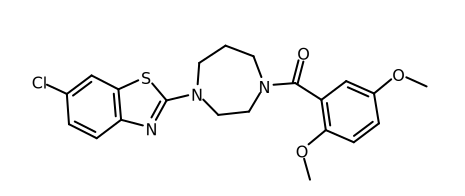

In [51]:
show (sketch2d:sketch2d |lig4|)

In [40]:
assignAtomTypes prot

Assigned 4835 types of a total of 4835 atoms.


NIL

In [41]:
energy = (chem:make-energy-function |prot|)

#<ENERGY-FUNCTION >

In [27]:
desc PROT.0

Describing PROT.0


"PROT.0" - simple string
 dimension:  6


NIL

In [29]:
PROT

#<AGGREGATE NIL 0>

In [13]:
*memb0*

#<MEMBRANE-PACKER::GA-MEMBRANE>

In [14]:
(defparameter *agg-atomvecs* (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t)))

*AGG-ATOMVECS*

In [15]:
*agg-atomvecs*

(#<AGGREGATE NIL 0> #<MEMBRANE-PACKER::ATOM-VECTORS>)

In [16]:
(defparameter *agg* (first *agg-atomvecs*))

*AGG*

In [17]:
(defparameter *atomvecs* (second *agg-atomvecs*))

*ATOMVECS*

In [18]:
agg = *AGG*

#<AGGREGATE NIL 0>

In [19]:
v = show *AGG*

#<NGLV:NGLWIDGET>

In [111]:
assignAtomTypes memb

Assigned 24935 types of a total of 24935 atoms.


NIL

In [112]:
(defparameter *ef* (chem:make-energy-function *agg*))


Undefined variable *AGG*

An error occurred of type: UNBOUND-VARIABLE: 
  The variable *AGG* is unbound.

serious-condition backtrace:
0: (ERROR UNBOUND-VARIABLE :NAME *AGG*)
1: (LAMBDA)



NIL

In [84]:
(save-mol2 *agg* "/tmp/agg.mol2" :use-sybyl-types t)

Saving matter to /tmp/agg.mol2


NIL

In [85]:
(assign-atom-types *agg*)

NIL

In [87]:
(minimize *agg*)

Entered minimize
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
Condition of type ESTIMATED-ANGLE-TERM was signaled.
minimize-no-fail
======= Starting Steepest Descent Minimizer

;;; Suspending process #<PROCESS repl-thread @0x139d32699>
;;; Suspending process #<PROCESS auto-flush-thread @0x139d32789>
;;; Suspending process #<PROCESS swank-indentation-cache-thread @0x14273dc39>
;;; Suspending process #<PROCESS reader-thread @0x14273dd29>
;;; Suspending process #<PROCESS control-thread @0x14273de19>
;;; Suspending process #<PROCESS lparallel @0x142598969>
;;; Suspending process #<PROCESS lparallel @0x13756d009>
;;; Suspending process #<PROCESS lparallel @0x13756d0f9>
;


Could not find stretch parameter between #<ATOM :H2/:H 0> and #<ATOM :N/:N 0>

Could not find stretch parameter between #<ATOM :H3/:H 0> and #<ATOM :N/:N 0>

Could not find stretch parameter between #<ATOM :OXT/:O 0> and #<ATOM :C/:C 0>

Could not find stretch parameter between #<ATOM :H1/:H 0> and #<ATOM :N/:N 0>

Could not find stretch parameter between #<ATOM :H2/:H 0> and #<ATOM :N/:N 0>

Could not find stretch parameter between #<ATOM :H3/:H 0> and #<ATOM :N/:N 0>

Could not find stretch parameter between #<ATOM :OXT/:O 0> and #<ATOM :C/:C 0>

An error occurred of type: INTERACTIVE-INTERRUPT: 
  Console interrupt.

serious-condition backtrace:
0: (ERROR EXT:INTERACTIVE-INTERRUPT)
1: (SIMPLE-TERMINAL-INTERRUPT)
2: (_top.lsp-top131^482^TOP-COMPILE-FILE.39)
3: (_top.lsp-top131^482^TOP-COMPILE-FILE.31)
4: (_top.lsp-top131^482^TOP-COMPILE-FILE.30)
5: (_top.lsp-top131^482^TOP-COMPILE-FILE.28)
6: (_top.lsp-top131^482^TOP-COMPILE-FILE.27)
7: (TERMINAL-INTERRUPT)
8: (_top.lsp-top131^482^T

NIL

In [114]:
saveAmberParm memb "/tmp/agg.top" "/tmp/agg.crd"

Constructing energy function
Writing to /tmp/agg.top
Starting prepare-amber-energy-dihedral
Ordering i1,i2,i3,i4 prepare-amber-energy-dihedral
1-4 interactions prepare-amber-energy-dihedral
Counting w and w/o water prepare-amber-energy-dihedral
Extracting prepare-amber-energy-dihedral
Saving     [*************************************....] ETC:   0.5 secondssolvent_pointers info: iptres nspm nspsol -> NIL NIL NIL
Saving     [*******************************************] ETC: --



There should be a short residue name for NPRO - truncating

There should be a short residue name for CGLN - truncating

There should be a short residue name for NLYS - truncating

There should be a short residue name for CCYS - truncating


#<ENERGY-FUNCTION >

In [61]:
(membrane-packer::build-rigid-body-energy-function *memb*)

#<RIGID-BODY-ENERGY-FUNCTION >

In [27]:
(defparameter *efp* (multiple-value-list (membrane-packer::build-rigid-body-energy-function *memb*)))


Undefined variable *MEMB*

An error occurred of type: UNBOUND-VARIABLE: 
  The variable *MEMB* is unbound.

serious-condition backtrace:
0: (ERROR UNBOUND-VARIABLE :NAME *MEMB*)
1: (LAMBDA)



NIL

In [64]:
(defparameter *ef* (first *efp*))

*EF*

In [66]:
(defparameter *force* (make-array (chem:get-nvector-size *ef*) :element-type 'double-float))

*FORCE*

In [67]:
(defparameter *pos* (second *efp*))

*POS*

In [69]:
(chem:evaluate-energy-force *ef* *pos* t *force*)

4.623621002369209d10

In [63]:
(apply 'chem:evaluate-energy *efp*)

4.623621002369209d10

In [115]:
(defparameter *dyn* (membrane-packer::simulate-membrane |memb| 5))

Dynamics step 0
Dynamics step 1
Dynamics step 2
Dynamics step 3
Dynamics step 4


*DYN*

In [117]:
v = show *DYN*

#<NGLV:NGLWIDGET>

In [119]:
(nglv:add-representation |v| "ball+stick" :selection "protein")

T

In [59]:
(apropos "rigid")

CHEM:ENERGY-RIGID-BODY-COMPONENT
CHEM:ENERGY-RIGID-BODY-NONBOND
CHEM:ENERGY-RIGID-BODY-NONBOND-SET-TERM  Function
CHEM:ENERGY-RIGID-BODY-STAPLE
CHEM:ENERGY-RIGID-BODY-STAPLE-ADD-TERM  Function
CHEM:MAKE-ENERGY-RIGID-BODY-NONBOND  Function
CHEM:MAKE-ENERGY-RIGID-BODY-STAPLE  Function
CHEM:MAKE-RIGID-BODY-ENERGY-FUNCTION  Function
CHEM::NUMBER_OF_RIGID_BODIES
CORE::NUMBER_OF_RIGID_BODIES
CHEM:RIGID-BODY-ENERGY-FUNCTION
CHEM:RIGID-BODY-ENERGY-FUNCTION-ADD-TERM  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-GET-POSITION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-NORMALIZE-POSITION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-SET-POSITION  Function
CHEM:RIGID-BODY-ENERGY-FUNCTION-TERMS  Function


NIL

In [37]:
(save-mol2 *agg* "/tmp/agg.mol2" :use-sybyl-types t)

Saving matter to /tmp/agg.mol2


NIL

In [16]:
(defparameter *close-contacts* (membrane-packer::close-contacts *atomvecs*))

Completed  100.0% elapsed:  37.0 seconds ETC: --   There are 437 close-contacts of a possible 375498016


*CLOSE-CONTACTS*

In [17]:
(membrane-packer:add-close-contacts-as-shape |v| *close-contacts* :radius 2.0)

T

In [18]:
(defparameter *work-list* (membrane-packer::build-ga-membrane-work-list *memb*))

*WORK-LIST*

In [19]:
(defparameter *wlscore* (multiple-value-list (membrane-packer::score-work-list *work-list* *memb*)))

*WLSCORE*

In [20]:
*wlscore*

(434 #<MEMBRANE-PACKER::COLLISIONS>)

In [21]:
(defparameter *score* (multiple-value-list (membrane-packer:score-ga-membrane *memb*)))

*SCORE*

In [22]:
*score*

(434 #<MEMBRANE-PACKER::COLLISIONS>)

In [23]:
(defparameter *collisions* (second *score*))

*COLLISIONS*

In [24]:
(membrane-packer:add-collisions-as-shape |v| *collisions* :radius 2.1)

T

# Test GA

In [35]:
memb1 = (membrane-packer:build-ga-membrane prot)


We should fill in a few more lipids from solute-colliders to fill in the membrane

We should fill in a few more lipids from solute-colliders to fill in the membrane


#<MEMBRANE-PACKER::GA-MEMBRANE>

In [36]:
membs = (membrane-packer::build-population memb1)

(#<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-ME

In [59]:
(chem:get-bounding-box-widths (membrane-packer::bounding-box memb1))

'( 70.7107 69.9854 88.479)

In [74]:
(membrane-packer::cross-membranes (elt membs 0) (elt membs 1))

bound0 bound1 -> 0.1122748 0.94081503
min-corner: '( -35.3553 -34.9927 -44.2395)
max-corner: '( 35.3553 34.9927 44.2395)


#<MEMBRANE-PACKER::GA-MEMBRANE>

In [76]:
(membrane-packer::score-ga-membrane (elt membs 0))

291

In [77]:
(membrane-packer::score-ga-membrane (elt membs 1))

324

In [84]:
(membrane-packer::score-ga-membrane (membrane-packer::cross-membranes (elt membs 0) (elt membs 1)))

279

In [20]:
agg = (membrane-packer::build-aggregate-from-ga-membrane one-membrane :debug t)

#<AGGREGATE NIL 0>

In [21]:
(show agg :shapes (list :close (membrane-packer::overlapping-octrees-as-shape one-membrane 40)))

#<NGLV:NGLWIDGET>

In [35]:
(membrane-packer::score-ga-membrane one-membrane)

Total scores: 2278   lipid-scores: 512     solute-scores: 54


407

In [26]:
(defparameter *wl* (membrane-packer::build-ga-membrane-work-list *tm*))

*WL*

In [27]:
(defparameter *membranes* (membrane-packer::build-population *tm*))

*MEMBRANES*

In [28]:
(defparameter *sorted-scored-pop* (membrane-packer::score-membranes *wl* *membranes*))

*SORTED-SCORED-POP*

In [29]:
(defparameter *scored-membranes* (membrane-packer:pack *prot* :parallel t :number-of-generations 40))

Generation 0   size 200
  ... least collisions -> (268 270 276 282 282 287 288 288 289 289)
Generation 1   size 200
  ... least collisions -> (206 216 216 221 221 224 226 228 229 230)
Generation 2   size 200
  ... least collisions -> (153 164 169 174 179 182 189 191 192 192)
Generation 3   size 200
  ... least collisions -> (154 154 154 154 160 162 162 171 171 171)
Generation 4   size 200
  ... least collisions -> (137 141 145 146 146 147 149 150 150 150)
Generation 5   size 200
  ... least collisions -> (134 134 136 137 137 137 138 138 138 140)
Generation 6   size 200
  ... least collisions -> (107 112 112 115 117 117 118 118 120 123)
Generation 7   size 200
  ... least collisions -> (103 103 105 105 106 106 112 114 115 115)
Generation 8   size 200
  ... least collisions -> (86 88 94 94 95 95 96 99 100 100)
Generation 9   size 200
  ... least collisions -> (59 74 74 76 77 77 77 77 77 78)
Generation 10  size 200
  ... least collisions -> (55 57 58 59 60 61 61 62 63 63)
Generation 11  s

*SCORED-MEMBRANES*

In [30]:
(defparameter *scored-membrane* (first *scored-membranes*))

*SCORED-MEMBRANE*

In [31]:
*scored-membrane*

#<MEMBRANE-PACKER::SCORED-MEMBRANE>

In [32]:
(defparameter *memb0* (membrane-packer::membrane *scored-membrane*))

*MEMB0*

In [33]:
*memb0*

#<MEMBRANE-PACKER::GA-MEMBRANE>

In [ ]:
(membrane-packer::evolve2 *memb0* :close-distance 2.0)

In [40]:
(defparameter *collision0* (membrane-packer::collisions *scored-membrane*))

*COLLISION0*

In [41]:
*collision0*

#<MEMBRANE-PACKER::COLLISIONS>

In [42]:
(defparameter *agg-atomvecs* (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t)))

*AGG-ATOMVECS*

In [43]:
*agg-atomvecs*

(#<AGGREGATE NIL 0> #<MEMBRANE-PACKER::ATOM-VECTORS>)

In [44]:
(defparameter *agg* (first *agg-atomvecs*))

*AGG*

In [45]:
show *AGG*

#<NGLV:NGLWIDGET>

In [46]:
(defparameter *atomvecs* (second *agg-atomvecs*))

*ATOMVECS*

In [47]:
(defparameter *v* (show *agg* :axes t)) *v*


Undefined variable *V*


#<NGLV:NGLWIDGET>

In [48]:
(defparameter *close-contacts* (membrane-packer::close-contacts *atomvecs*))

Completed  100.0% elapsed:  31.0 seconds ETC: --   There are 4 close-contacts of a possible 371779650


*CLOSE-CONTACTS*

In [49]:
(membrane-packer:add-close-contacts-as-shape *v* *close-contacts* :radius 2.0)

T

In [50]:
(defparameter *work-list* (membrane-packer::build-ga-membrane-work-list *memb0*))

*WORK-LIST*

In [51]:
(defparameter *wlscore* (multiple-value-list (membrane-packer::score-work-list *work-list* *memb0*)))

*WLSCORE*

In [52]:
*wlscore*

(0 #<MEMBRANE-PACKER::COLLISIONS>)

In [53]:
(defparameter *score* (multiple-value-list (membrane-packer:score-ga-membrane *memb0*)))

*SCORE*

In [54]:
*score*

(4 #<MEMBRANE-PACKER::COLLISIONS>)

In [55]:
(defparameter *collisions* (second *score*))

*COLLISIONS*

In [56]:
(membrane-packer:add-collisions-as-shape *v* *collisions* :radius 2.1)

T

# Try optimizing a membrane

In [52]:
(defparameter *scored-membranes* (membrane-packer:pack *prot* :parallel t :number-of-generations 50))

Generation 0   ... least collisions -> (134 151 155 156 156 157 160 164 165 167)



An error occurred of type: SEQUENCE-OUT-OF-BOUNDS: 
  Sequence index 3 is out of bounds (INTEGER 0 2).

serious-condition backtrace:
0: (ERROR CORE:SEQUENCE-OUT-OF-BOUNDS :DATUM 3 :OBJECT (#<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE> #<MEMBRANE-PACKER::SCORED-MEMBRANE>) :EXPECTED-TYPE (INTEGER 0 2))
1: (EVOLVE #<AGGREGATE NIL @0x12beb7488> :INPUT-BOUNDING-BOX NIL :PARALLEL T :NUMBER-OF-GENERATIONS 100)
2: (APPLY MEMBRANE-PACKER::EVOLVE #<AGGREGATE NIL @0x12beb7488> :INPUT-BOUNDING-BOX NIL (:PARALLEL T :NUMBER-OF-GENERATIONS 100))
3: (PACK #<AGGREGATE NIL @0x12beb7488> :PARALLEL T :NUMBER-OF-GENERATIONS 100)
4: (LAMBDA)



NIL

In [37]:
(defparameter *memb0* (second (elt *scored-membranes* 0)))

*MEMB0*

In [38]:
(defparameter *agg0* (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t))

*AGG0*

In [39]:
(defparameter *v0* (show *agg0*)) *v0*

#<NGLV:NGLWIDGET>

In [40]:
(defparameter *wl0* (membrane-packer::build-ga-membrane-work-list *memb0*))

*WL0*

In [41]:
(multiple-value-list (membrane-packer::score-work-list *wl0* *memb0*))

(1 #<MEMBRANE-PACKER::COLLISIONS>)

In [42]:
(defparameter *score0* (multiple-value-list (membrane-packer::score-work-list *wl0* *memb0*)))

*SCORE0*

In [43]:
(defparameter *collisions0* (second *score0*))

*COLLISIONS0*

In [44]:
(membrane-packer:add-collisions-as-shape *v0* *collisions0* :radius 2.1)

T

# Find two lipids that interact with yellow spheres (close contacts) but not magenta (collisions using octrees)

In [57]:
(defparameter *l1* (membrane-packer::find-ga-lipid *memb* 9))
(defparameter *l2* (membrane-packer::find-ga-lipid *memb* 169))

*L2*

In [59]:
(format t "*l1* -> ~a .   *l2* -> ~a ~%" *l1* *l2*)

*l1* -> #<GA-LIPID :id 9 :lipid-index 94> .   *l2* -> #<GA-LIPID :id 169 :lipid-index 34> 


NIL

In [60]:
(array-dimensions (membrane-packer::array *memb*))

(9 12 2)

In [61]:
(membrane-packer::array-indices *l1*)

(4 0 0)

In [62]:
(membrane-packer::array-indices *l2*)

(3 9 0)

In [63]:
(defparameter *range* (membrane-packer:find-collision-range *collisions* *l1* *l2*))

*RANGE*

In [64]:
*range*

NIL

In [65]:
(defparameter *fa-atomvecs* (multiple-value-list (membrane-packer::focused-aggregate *memb* (list *l1* *l2*))))
(defparameter *fa* (first *fa-atomvecs*))
(defparameter *atomvecs* (second *fa-atomvecs*))


Undefined variable *FA-ATOMVECS*

Undefined variable *FA-ATOMVECS*


*ATOMVECS*

In [66]:
(defparameter *octree-shape* (membrane-packer::ga-lipid-octree-as-shape *l2*))

*OCTREE-SHAPE*

In [68]:
(defparameter *vfa* (show *fa* :shapes (list :octree *octree-shape*))) *vfa*

#<NGLV:NGLWIDGET>

In [30]:
(defparameter *cc* (membrane-packer::close-contacts *atomvecs*))

Completed  100.0% elapsed:   1.0 seconds ETC: --   There are 1 close-contacts of a possible 17956


*CC*

In [31]:
(membrane-packer::add-close-contacts-as-shape *vfa* *cc* :radius 0.3)

T

In [32]:
(defparameter *fa-collisions* (membrane-packer::make-collisions))
(let ((chem:*debug-octree* nil))
     (membrane-packer::score-cell (membrane-packer::bounding-box *memb*) *l1* *l2* *fa-collisions*))


Undefined variable *FA-COLLISIONS*


0

In [33]:
(membrane-packer::indices *fa-collisions*)

#()

In [34]:
(membrane-packer:add-collisions-as-shape *vfa* *fa-collisions* :radius 0.31)

T

## Set the atom names in l1 and l2

In [36]:
(defparameter *r1* :l9-pa) (defparameter *sr1* :pa) (defparameter *n1* :h3r)
(defparameter *r2* :l169-pa) (defparameter *sr2* :pa) (defparameter *n2* :h2r)

*N2*

# Apply a bounding box transformation

In [37]:
(defparameter *bbox* (membrane-packer::bounding-box *memb*))
(format t "widths: ~,2f ~,2f ~,2f~%" (chem:get-x-width *bbox*) (chem:get-y-width *bbox*) (chem:get-z-width *bbox*)))

widths: 94.87 91.29 60.00



Undefined variable *BBOX*

Undefined variable *BBOX*

Undefined variable *BBOX*


NIL

In [40]:
(defparameter *tfa* (chem:matter-copy *fa*))
(chem:apply-transform-to-atoms (mol *tfa* 0) (geom:make-m4-translate (geom:vec 0.0 (chem:get-y-width *bbox*) 0.0)))

NIL

In [41]:
(show *tfa* :shapes (list :octree *octree-shape*))

#<NGLV:NGLWIDGET>

In [42]:
(defparameter *tfa-atom1* (chem:first-atom-with-name (chem:content-with-name (mol *tfa* 0) *r1*) *n1*))
(defparameter *tfa-pos1* (chem:get-position *tfa-atom1*))
(defparameter *tfa-atom2* (chem:first-atom-with-name (chem:content-with-name (mol *tfa* 1) *r2*) *n2*))
(defparameter *tfa-pos2* (chem:get-position *tfa-atom2*))


Undefined variable *TFA-ATOM1*

Undefined variable *TFA-ATOM2*


*TFA-POS2*

In [43]:
(format t "~a *tfa-pos1* -> ~a   ~a *tfa-pos2* -> ~a~%" *tfa-atom1* *tfa-pos1* *tfa-atom2* *tfa-pos2*)

#<ATOM :H3R/:H @0x136470a59> *tfa-pos1* -> '( -12.02 37.6815 12.6495)   #<ATOM :H2R/:H @0x135e32969> *tfa-pos2* -> '( -12.388 37.1262 12.3398)


NIL

In [44]:
(let* ((diff (geom:v- *tfa-pos1* *tfa-pos2*))
       (tdelta (geom:vlength diff))
       (delta (sqrt (chem:bounding-box-distance-squared-between-two-points (membrane-packer::bounding-box *memb*) *tfa-pos1* *tfa-pos2*))))
      (format t "pos1 -> ~a  pos2 -> ~a  non-bbox delta -> ~,2f  bbox-delta -> ~,2f close-distance -> ~,2f~%" *tfa-pos1* *tfa-pos2* tdelta delta membrane-packer::*close-distance*))

pos1 -> '( -12.02 37.6815 12.6495)  pos2 -> '( -12.388 37.1262 12.3398)  non-bbox delta -> 0.73  bbox-delta -> 0.73 close-distance -> 1.20


NIL

# Check the positions with the untransformed system

In [45]:
(defparameter *fa-atom1* (chem:first-atom-with-name (chem:content-with-name (mol *fa* 0) *r1*) *n1*))
(defparameter *fa-pos1* (chem:get-position *fa-atom1*))
(defparameter *fa-atom2* (chem:first-atom-with-name (chem:content-with-name (mol *fa* 1) *r2*) *n2*))
(defparameter *fa-pos2* (chem:get-position *fa-atom2*))


Undefined variable *FA-ATOM1*

Undefined variable *FA-ATOM2*


*FA-POS2*

In [46]:
(format t "~a *fa-pos1* -> ~a   ~a *fa-pos2* -> ~a~%" *fa-atom1* *fa-pos1* *fa-atom2* *fa-pos2*)

#<ATOM :H3R/:H @0x13594ae19> *fa-pos1* -> '( -12.02 -53.6056 12.6495)   #<ATOM :H2R/:H @0x135500d29> *fa-pos2* -> '( -12.388 37.1262 12.3398)


NIL

In [56]:
(show *fa* :axes t :shapes (list :octree *octree-shape*))

#<NGLV:NGLWIDGET>

In [48]:
(defparameter *memb-pos1* (membrane-packer::find-ga-lipid-position *l1* *sr1* *n1*))
(defparameter *memb-pos2* (membrane-packer::find-ga-lipid-position *l2* *sr2* *n2*))

*MEMB-POS2*

In [49]:
(format t "*memb-pos1* -> ~a   *memb-pos2* -> ~a~%" *memb-pos1* *memb-pos2*)

*memb-pos1* -> '( -12.02 -53.6056 12.6495)   *memb-pos2* -> '( -12.388 37.1262 12.3398)


NIL

In [50]:
(let* ((diff (geom:v- *memb-pos1* *memb-pos2*))
       (delta (sqrt (chem:bounding-box-distance-squared-between-two-points (membrane-packer::bounding-box *memb*) *fa-pos1* *fa-pos2*))))
      (format t "pos1 -> ~a  pos2 -> ~a  bbox delta -> ~,2f  close-distance -> ~,2f~%" *fa-pos1* *fa-pos2* delta membrane-packer::*close-distance*))

pos1 -> '( -12.02 -53.6056 12.6495)  pos2 -> '( -12.388 37.1262 12.3398)  bbox delta -> 0.73  close-distance -> 1.20


NIL

In [51]:
(defparameter *octree-stack* (multiple-value-list (membrane-packer::find-ga-lipid-octree *l2* *sr2* *n2*)))
*octree-stack*

Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -0.264288 -0.124874 0.19699)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -3.3095 -2.87484 -6.14693)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -4.8321 -4.24982 -9.31888)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -4.8321 -4.24982 -2.97497)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -4.8321 -1.49986 -2.97497)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -1.78689 -4.24982 -9.31888)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -1.78689 -4.24982 -2.97497)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -1.78689 -1.49986 -2.97497)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -2.5482 -2.18735 -1.38899)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -2.5482 -0.812364 -4.56095)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -2.92885 -1.15611 -3.76796)
Skipping octree #<GENERIC-OCTREE >  data: NIL origin: '( -2.92885 -0.


Undefined variable *OCTREE-STACK*


(132
 #(#<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE >))

Get the position of the source atom

In [52]:
(defparameter *stack* (second *octree-stack*))
*stack*


Undefined variable *STACK*


#(#<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE >)

In [53]:
(membrane-packer::bounding-box *memb*)

#<BOUNDING-BOX >

In [54]:
*memb-pos1*

'( -12.02 -53.6056 12.6495)

In [55]:
(defparameter *test-collisions* (membrane-packer::make-collisions))
(let ((chem:*debug-octree* t))
  (chem:generic-octree-get-points-within-cutoff (elt *stack* 0)
                                                membrane-packer::*close-distance*
                                                :dummy-value
                                                *memb-pos1*
                                                (membrane-packer::bounding-box *memb*)
                                                (membrane-packer::indices *test-collisions*)))
(membrane-packer::indices *test-collisions*)

-------- getPointsWithinCutoff  depth 0    isLeafNode -> 0     this->_data.boundp() -> 0
 x_size, y_size, z_size: 94.868332, 91.287117, 60.000000 | x_rsize, y_rsize, z_rsize: 0.010541, 0.010954, 0.016667
querypoint -> -12.020044 -53.605571 12.649463
this->_children[0]->_origin -> -3.309498 -2.874837 -6.146925
this->_children[0]->_halfDimension -> 3.045210 2.749963 6.343915
skipping child dx->8.710546 > this->_children[0]->_halfDimension.getX()+cutoff->4.245210 
this->_children[1]->_origin -> -3.309498 -2.874837 6.540905
this->_children[1]->_halfDimension -> 3.045210 2.749963 6.343915
skipping child dx->8.710546 > this->_children[1]->_halfDimension.getX()+cutoff->4.245210 
this->_children[2]->_origin -> -3.309498 2.625089 -6.146925
this->_children[2]->_halfDimension -> 3.045210 2.749963 6.343915
skipping child dx->8.710546 > this->_children[2]->_halfDimension.getX()+cutoff->4.245210 
this->_children[3]->_origin -> -3.309498 2.625089 6.540905
this->_children[3]->_halfDimension -> 3.04521


Undefined variable *TEST-COLLISIONS*

Undefined variable *TEST-COLLISIONS*


#()

In [58]:
*octree-stack*

(126
 #(#<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE > #<GENERIC-OCTREE >))

In [44]:
(defparameter *scored-membranes* (membrane-packer:pack *prot*))


An error occurred of type: TASK-KILLED-ERROR: 
  The task was killed.

serious-condition backtrace:
0: (ERROR #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>)
1: UNWRAP-RESULT
2: (RECEIVE-RESULT #S(LPARALLEL.KERNEL:CHANNEL :QUEUE #S(LPARALLEL.CONS-QUEUE:CONS-QUEUE :IMPL #S(LPARALLEL.RAW-QUEUE:RAW-QUEUE :HEAD (#S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARALLEL.KERNEL:TASK-KILLED-ERROR>) #S(LPARALLEL.KERNEL::WRAPPED-ERROR :VALUE #<LPARAL

NIL

In [75]:
(defparameter *scored-membrane* (elt *scored-membranes* 0))

*SCORED-MEMBRANE*

In [76]:
*scored-membrane*

(0 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::COLLISIONS>)

In [77]:
(defparameter *agg* (membrane-packer:build-aggregate-from-ga-membrane (second *scored-membrane*)))

center '( -3.54272e-14 1.13175e-13 2.8385e-14)


*AGG*

In [78]:
(defparameter *v* (show *agg* :axes t)) *v*

#<NGLV:NGLWIDGET>

In [79]:
(membrane-packer:add-collisions-as-shape *v* (third *scored-membrane*))

T

In [80]:
(defparameter *close-contacts* (membrane-packer::close-contacts *agg*))

Completed  100.0% elapsed:  10.0 seconds ETC: --   There are 240 close-contacts of a possible 286368214


*CLOSE-CONTACTS*

In [84]:
(membrane-packer:add-close-contacts-as-shape *v* *close-contacts*)

T

In [26]:
(save-mol2 *agg* "/tmp/zzbest.mol2" :use-sybyl-types t)

Saving matter to /tmp/zzbest.mol2


NIL

In [22]:
(chem:geometric-center (solute (ga-solute *memb*)))

'( -3.54272e-14 1.13175e-13 2.8385e-14)

In [23]:
(defparameter *memb1* (copy-ga-membrane *memb*))

*MEMB1*

In [7]:
(start-swank 4010)

Swank is already running


NIL

In [1]:
*default-pathname-defaults*

#P"/Users/meister/Dropbox/Design/alkermes/"

In [3]:
(setup-amber-paths)

(#P"/Users/meister/Development/amber18/dat/antechamber/"
 #P"/Users/meister/Development/amber18/dat/leap/cmd/"
 #P"/Users/meister/Development/amber18/dat/leap/parm/"
 #P"/Users/meister/Development/amber18/dat/leap/lib/"
 #P"/Users/meister/Development/amber18/dat/leap/prep/")

In [9]:
source "leaprc.protein.ff14SB"

Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



((T))

In [10]:
source "leaprc.lipid14"

Adding force field lipid14.dat to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



((T))

In [11]:
source "leaprc.water.tip3p"

Adding force field frcmod.tip3p to DEFAULT
Adding force field frcmod.ionsjc_tip3p to DEFAULT
Adding force field frcmod.ions234lm_126_tip3p to DEFAULT



add-atom-types doesn't do anything


((T))

In [12]:
source "leaprc.gaff"

Adding force field gaff.dat to DEFAULT



add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



((T))

In [13]:
*popc*

#<LIPID-INFO>

In [ ]:
(test-everything1)

In [31]:
(defparameter *dyn* (test-everything))

Adding force field gaff.dat to DEFAULT
Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT
Adding force field lipid14.dat to DEFAULT
Adding force field frcmod.tip3p to DEFAULT
Adding force field frcmod.ionsjc_tip3p to DEFAULT
Adding force field frcmod.ions234lm_126_tip3p to DEFAULT
Adding force field gaff.dat to DEFAULT
Building an empty membrane
Translation vector: '( -52.8892 -48.7931 -55.1242)
Total solute charge:  12.00  Max atom radius:   2.00
Box:
   enclosing:  -29.53 -24.60 -39.13   32.81 21.28 41.35
PdHalfEdges:        64.00
PdHalfDiagonals:     110.85 Angstrom.
PdHalfEdges:        32.00
PdHalfDiagonals:     55.43 Angstrom.
PdHalfEdges:        16.00
PdHalfDiagonals:     27.71 Angstrom.
PdHalfEdges:         8.00
PdHalfDiagonals:     13.86 Angstrom.
PdHalfEdges:         4.00
PdHalfDiagonals:      6.93 Angstrom.
PdHalfEdges:         2.00
PdHalfDiagonals:      3.46 Angstrom.
PdHalfEdges:         1.00
PdHalfDiagonals:      1.73 Angstrom.
PdHalfEdges


Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences


add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences


add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences


add-atom-types doesn't do anything

add-atom-types doesn't do anything

Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences


Could not find stretch parameter between #<ATOM :H2/:H @0x19d29d1e9> and #<ATOM :N/:N @0x19d29d2d9>

Could not find stretch parameter between #<ATOM :H3/:H @0x19d29d0f9> and #<ATOM :N/:N @0x19d29d2d9>

Could not find stretch parameter between #<ATOM :OXT/:O @0x192176d29> and #<ATOM :C/:C @0x192176f09>

Could not find stretch parameter between #<ATOM :H1/:H @0x192176b49> and #<ATOM :N/:N @0x192176c39>

Could not find stretch parameter between #<ATOM :H2/:H @0x192176a59> and #<ATOM :N/:N @0x192176c39>

Could not fin

*DYN*

In [32]:
(show *dyn*)

#<NGLV:NGLWIDGET>

In [13]:
(assign-atom-types *p*)

NIL

In [17]:
(do-molecules (mol *p*)
    (do-residues (res mol)
        (do-atoms (atm res)
            (when (eq :N (chem:get-type atm))
                (format t "~a ~a ~a~%" mol res atm)))))

#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :PRO @0x167647e88> #<ATOM :N/:N @0x1676630f9>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :LYS @0x167647e08> #<ATOM :N/:N @0x151dfbe19>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :GLU @0x167647d88> #<ATOM :N/:N @0x133ff2009>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :TYR @0x167647d08> #<ATOM :N/:N @0x1329f0789>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :GLU @0x167647c88> #<ATOM :N/:N @0x16735de19>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :TRP @0x167647c08> #<ATOM :N/:N @0x135fb1789>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :VAL @0x167647b88> #<ATOM :N/:N @0x135fb60f9>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :LEU @0x167647b08> #<ATOM :N/:N @0x135fc11e9>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :ILE @0x167647a88> #<ATOM :N/:N @0x135fe4009>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :ALA @0x167647a08> #<ATOM :N/:N @0x135ffae19>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :GLY @0x167647988> #<ATOM :N/:N @0x135ffa4b9>
#<MOLECULE NIL @0x128a6fcc8> #<RESIDUE :TYR @0x167647908> #<ATOM 

NIL

In [9]:
(defparameter *empty* (build-empty-membrane))

*EMPTY*

In [10]:
(show *empty*)

#<NGLV:NGLWIDGET>

In [11]:
(defparameter *ot* (chem:make-oct-tree *empty* :interior-solute 1.0 0.0 0.0 (chem:compute-merged-nonbond-force-field-for-aggregate *empty*) 0 t))

Total solute charge:  -0.00  Max atom radius:   2.10
Box:
   enclosing:  -63.97 -63.26 -27.19   54.02 55.12 27.19
PdHalfEdges:        64.00
PdHalfDiagonals:     110.85 Angstrom.
PdHalfEdges:        32.00
PdHalfDiagonals:     55.43 Angstrom.
PdHalfEdges:        16.00
PdHalfDiagonals:     27.71 Angstrom.
PdHalfEdges:         8.00
PdHalfDiagonals:     13.86 Angstrom.
PdHalfEdges:         4.00
PdHalfDiagonals:      6.93 Angstrom.
PdHalfEdges:         2.00
PdHalfDiagonals:      3.46 Angstrom.
PdHalfEdges:         1.00
PdHalfDiagonals:      1.73 Angstrom.
PdHalfEdges:         0.50
PdHalfDiagonals:      0.87 Angstrom.
   sized:			      64.03 64.74 100.81
   edge:        128.00
Resolution:      1.00 Angstrom.
Tree depth: 7
About to build interior octant iAtoms -> 32428
Volume =  0.00 of box, grid points 1061522


*OT*

In [20]:
(show *agg*)

#<NGLV:NGLWIDGET>

In [14]:
(multiple-value-list (chem:oct-tree-find-closest-atom *ot* (geom:vec 0 0 0)))

(#<ATOM :H16R/:H @0x1247de3c9> #<RESIDUE PA @0x124fb6988>
 #<MOLECULE :lipid122 @0x124011248>)

In [12]:
(chem:number-of-atoms *empty*)

32428

In [12]:
(defparameter *dyn* (simulate-membrane *empty*))

*DYN*

In [ ]:
(dynamics:velocity-verlet-step *dyn*)

In [9]:
(defparameter *memb* (load-pdb "4s0v_popc_membrane_hid.pdb"))


More than four bonds to carbon will be made to #<ATOM :C12/:C @0x136f60f09>

There are 28 unbuilt heavy atoms - not building hydrogens


*MEMB*

In [14]:
(defparameter *sm* (carve-membrane *memb* (lambda (cog) (< (geom:vx cog) -20))))

*SM*

In [23]:
(cando:move-geometric-center-to-origin *sm*)

Translation vector: '( 35.9127 0.141911 -0.0693738)


NIL

In [26]:
(leap.set-box:set-box *sm* :centers -2.0)


An error occurred of type: SIMPLE-ERROR: 
  Expected 3 non-negative floating point numbers {x y z} for third argument


serious-condition backtrace:
0: (ERROR "Expected 3 non-negative floating point numbers {x y z} for third argument~%")
1: (SET-BOX #<AGGREGATE 4s0v_popc_membrane_hid @0x126b50c68> :CENTERS -2.0)
2: (LAMBDA)



NIL

In [25]:
(show *sm* :axes t)

#<NGLV:NGLWIDGET>

In [12]:
*memb*

#<AGGREGATE 4s0v_popc_membrane_hid @0x131b53848>

In [13]:
(show *memb*)

#<NGLV:NGLWIDGET>

In [14]:
(leap.set-box:set-box *memb* :centers 5.0)

Box dimensions 124.92900085449219d0 124.42499923706055d0 85.93000030517578d0


NIL

In [15]:
(chem:get-x-width (chem:bounding-box *memb*))

124.92900085449219d0

In [16]:
(show *memb* :axes t)

#<NGLV:NGLWIDGET>

In [17]:
(do-molecules (mol *memb*) 
    (when (< (chem:number-of-atoms mol) 200)
        (chem:setf-molecule-type mol :lipid)))

NIL

In [ ]:
(prepare-popc-lipids)

In [17]:
(defparameter *ppp* (load-cando "source-dir:extensions;cando;src;data;poc.cando"))

*PPP*

In [3]:
(defparameter *lipids* nil)
(do-molecules (mol *memb*)
    (when (eq (chem:molecule-type mol) :lipid)
          (push mol *lipids*)))


Undefined variable *LIPIDS*

Undefined variable *LIPIDS*

Undefined variable *MEMB*

Undefined variable *MEMB*

Undefined variable *MEMB*

An error occurred of type: UNBOUND-VARIABLE: 
  The variable *MEMB* is unbound.

serious-condition backtrace:
0: (ERROR UNBOUND-VARIABLE :NAME *MEMB*)
1: (LAMBDA)



NIL

In [42]:
(defparameter *cl* (canonicalize-lipids *lipids* '(:p31 :n31) '(:c116 :c118)))

*CL*

In [27]:
*cl*

(#<MOLECULE :mol_1 @0x15593f128> #<MOLECULE :mol_2 @0x155930608>
 #<MOLECULE :mol_3 @0x155922ae8> #<MOLECULE :mol_4 @0x155913008>
 #<MOLECULE :mol_5 @0x1559064e8> #<MOLECULE :mol_6 @0x1558f99c8>
 #<MOLECULE :mol_7 @0x1558ebea8> #<MOLECULE :mol_8 @0x1558db3c8>
 #<MOLECULE :mol_9 @0x1558cd8a8> #<MOLECULE :mol_10 @0x1558c1d88>
 #<MOLECULE :mol_11 @0x1558b22a8> #<MOLECULE :mol_12 @0x1558a4788>
 #<MOLECULE :mol_13 @0x155894c68> #<MOLECULE :mol_14 @0x155885188>
 #<MOLECULE :mol_15 @0x155879668> #<MOLECULE :mol_16 @0x15586bb48>
 #<MOLECULE :mol_17 @0x15585b068> #<MOLECULE :mol_18 @0x15584f548>
 #<MOLECULE :mol_19 @0x15583fa28> #<MOLECULE :mol_20 @0x155832f08>
 #<MOLECULE :mol_21 @0x155822428> #<MOLECULE :mol_22 @0x155814908>
 #<MOLECULE :mol_23 @0x155807de8> #<MOLECULE :mol_24 @0x1557f8308>
 #<MOLECULE :mol_25 @0x1557ea7e8> #<MOLECULE :mol_26 @0x1557dccc8>
 #<MOLECULE :mol_27 @0x1557cd1e8> #<MOLECULE :mol_28 @0x1557bf6c8>
 #<MOLECULE :mol_29 @0x1557b2ba8> #<MOLECULE :mol_30 @0x1557a20c8>
 #<M

In [45]:
(show (first *cl*) :axes t)

#<NGLV:NGLWIDGET>

In [1]:
(defparameter *mp* (chem:make-aggregate))

*MP*

In [2]:
(chem:add-molecule *mp* (mol *memb* 0))


Undefined variable *MEMB*

An error occurred of type: UNBOUND-VARIABLE: 
  The variable *MEMB* is unbound.

serious-condition backtrace:
0: (ERROR UNBOUND-VARIABLE :NAME *MEMB*)
1: (LAMBDA)



NIL

In [47]:
(chem:make-oct-tree (mol *memb* 0) :interior-solute 

#<NGLV:NGLWIDGET>

In [44]:
*v*

#<NGLV:NGLWIDGET>

In [33]:
(defparameter *v* (show (apply #'combine *cl*)))

*V*

In [37]:
(apropos "oct-tree")

CHEM:OCT-OCT-TREE-CREATE  Function
CHEM:OCT-TREE-DELETE-SPHERE  Function
CHEM:OCT-TREE-INIT-CHARGES  Function
CHEM:OCT-TREE-UPDATE-CHARGE  Function


NIL

In [34]:
*v*

#<NGLV:NGLWIDGET>

In [35]:
(nglv:add-axes *v*)

T

In [31]:
(do-molecules (mol *memb*) (when (= (chem:number-of-atoms mol) 134) (push mol *lipids*)))

NIL

In [22]:
(save-cando *poc* "source-dir:extensions;cando;src;data;poc.cando")

#<AGGREGATE :PCPAOL @0x14393d828>

In [32]:
(show (first *lipids*))

#<NGLV:NGLWIDGET>

In [7]:
(defparameter *merck* (chem:moe-read-aggregate (namestring (merge-pathnames "merck_suvorexant_derivatives.moe"))))

*MERCK*

In [24]:
(chem:setf-force-field-name (mol *merck* 0) :default)

NIL

In [25]:
(chem:setf-force-field-name (mol *merck* 1) :default)

NIL

In [ ]:
(assign-atom-types)

In [22]:
(show *merck* :axes t)

#<NGLV:NGLWIDGET>

In [8]:
(defparameter *v* (show *merck*))

*V*

In [9]:
*v*

#<NGLV:NGLWIDGET>

In [25]:
(nglv::add-axes *v*)

T

In [26]:
(defparameter *cc* (chem:geometric-center *merck*))

*CC*

In [27]:
(chem:apply-transform-to-atoms *merck* (geom:make-m4-translate (geom:v* *cc* -1.0)))

NIL

In [28]:
(defparameter *v* (show *merck*))

*V*

In [29]:
*v*

#<NGLV:NGLWIDGET>

In [33]:
(show (mol *merck* 6))

#<NGLV:NGLWIDGET>

In [12]:
(defparameter *mols* (chem:map-molecules 'list #'identity *merck*))

*MOLS*

In [13]:
(defparameter *ligands* (subseq *mols* 2 (length *mols*)))

*LIGANDS*

In [14]:
(load (compile-file "~/Development/D3R-GC4/cando/tools.lisp"))

; Compiling file: /Users/meister/Development/D3R-GC4/cando/tools.lisp
;   (DEFPARAMETER *STAGE1-NONBOND-CUTOFF* ...)
;   (DEFPARAMETER *STAGE1-SCALE-SKETCH-NONBOND* ...)
;   (DEFPARAMETER *STAGE1-VELOCITY-SCALE* ...)
;   (DEFPARAMETER *STAGE2-VELOCITY-SCALE* ...)
;   (DEFPARAMETER *STAGE1-SKETCH-NONBOND-FORCE* ...)
;   (DEFPARAMETER *FIRST-BOND-FORCE* ...)
;   (DEFPARAMETER *BOND-LENGTH* ...)
;   (DEFPARAMETER *RANDOM-SCALE* ...)
;   (DEFPARAMETER *OOZP-SCALE* ...)
;   (DEFUN DIFFERENT-FLOATS ...)
;   (DEFCLASS ATOM-INFO ...)
;   (DEFCLASS CHANGE-TRACKER ...)
;   (DEFUN CLASSIFY-ATOM-INFO ...)
;   (DEFUN DRAW-NAMES ...)
;   (DEFUN MAKE-CHANGE-TRACKER ...)
;   (DEFUN MESSAGE-IF-CHANGED ...)
;   (DEFUN DUMP ...)
;   (DEFMETHOD SHOW ...)
;   (DEFUN EASY-LOAD-TOP-CRD ...)
;   (DEFUN MAKE-HASH-TABLE-FROM-MATCHES ...)
;   (DEFUN DRAW-NAME-FOR-MATCHES ...)
;   (DEFCLASS ONE-MATCH ...)
;   (DEFMETHOD PRINT-OBJECT ...)
;   (DEFCLASS MANY-MATCHES ...)
;   (DEFUN SKETCH-MATCH-MOLS ...)
;   (DEFUN


Undefined variable *PRM7TOP7-PATHNAME-DEFAULTS*


T

Missing-h NIL


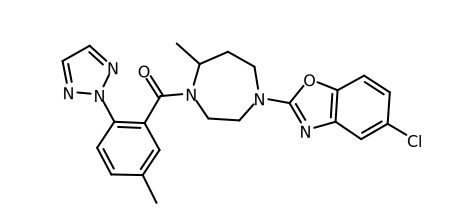

In [15]:
(show (sketch2d:sketch2d (first *ligands*)))

Missing-h NIL


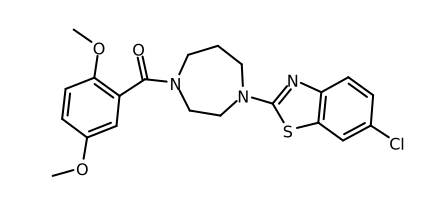

In [16]:
(show (sketch2d:sketch2d (second *ligands*)))

Missing-h NIL


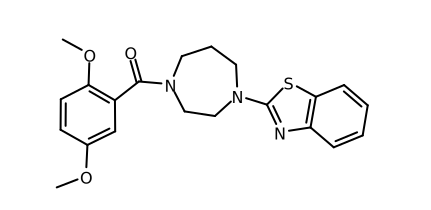

In [17]:
(show (sketch2d:sketch2d (third *ligands*)))

Missing-h NIL


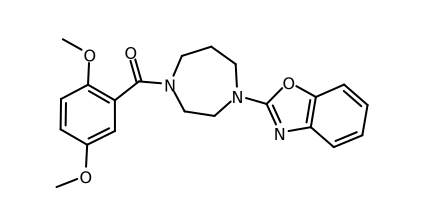

In [18]:
(show (sketch2d:sketch2d (fourth *ligands*)))

Missing-h NIL


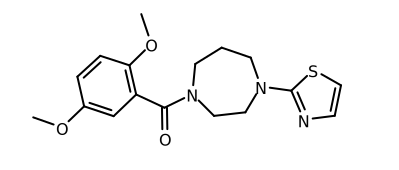

In [20]:
(show (sketch2d:sketch2d (fifth *ligands*)))

Missing-h NIL


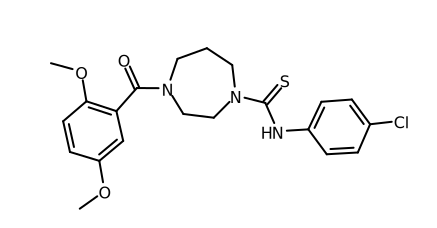

In [21]:
(show (sketch2d:sketch2d (sixth *ligands*)))

In [19]:
(length *ligands*)

18

In [28]:
(defparameter *c* (match-all-molecules *ligands*))

Removing atoms (#<ATOM :N6/:N @0x13b65e2d9> #<ATOM :H28/:H @0x13b65e3c9>
 #<ATOM :C28/:C @0x13b65e4b9> #<ATOM :H27/:H @0x13b65e5a9>
 #<ATOM :C27/:C @0x13b65e699> #<ATOM :N5/:N @0x13b65e789>
 #<ATOM :N4/:N @0x13b65e879> #<ATOM :C20/:C @0x13b65e969>
 #<ATOM :H24/:H @0x13b65ea59> #<ATOM :H293/:H @0x13b65eb49>
 #<ATOM :H292/:H @0x13b65ec39> #<ATOM :H291/:H @0x13b65ed29>
 #<ATOM :C29/:C @0x13b65ee19> #<ATOM :H22/:H @0x13b65ef09>
 #<ATOM :H21/:H @0x13b65c009> #<ATOM :C21/:C @0x13b65c0f9>
 #<ATOM :C22/:C @0x13b65c1e9> #<ATOM :H303/:H @0x13b65a1e9>
 #<ATOM :H302/:H @0x13b65a2d9> #<ATOM :H301/:H @0x13b65a3c9>
 #<ATOM :C30/:C @0x13b65a4b9> #<ATOM :CL1/:Cl @0x13b65af09>
 #<ATOM :H6/:H @0x13b6580f9> #<ATOM :O1/:O @0x13b6582d9>)
Removing #<ATOM :O1/:O @0x13593cc39> from #<RESIDUE :SUV @0x12e227208>
Removing #<ATOM :H6/:H @0x13593ca59> from #<RESIDUE :SUV @0x12e227208>
Removing #<ATOM :CL1/:Cl @0x13593c879> from #<RESIDUE :SUV @0x12e227208>
Removing #<ATOM :C30/:C @0x13206ee19> from #<RESIDUE :SUV @


An error occurred of type: SIMPLE-PROGRAM-ERROR: 
  Residue does not contain atom for removal

serious-condition backtrace:
0: (ERROR CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "Residue does not contain atom for removal" :FORMAT-ARGUMENTS NIL)
1: (APPLY #<FUNCTION ERROR> CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "Residue does not contain atom for removal" :FORMAT-ARGUMENTS NIL NIL)
2: (SIGNAL-SIMPLE-ERROR CORE:SIMPLE-PROGRAM-ERROR NIL "Residue does not contain atom for removal" NIL)
3: (GENERATE-COMMON-SUB-MOLECULE #<MOLECULE NIL @0x13b645a28> (#<ATOM :H63/:H @0x13b6632d9> #<ATOM :H62/:H @0x13b6633c9> #<ATOM :H61/:H @0x13b6634b9> #<ATOM :C6/:C @0x13b6635a9> #<ATOM :O4/:O @0x13b663699> #<ATOM :H293/:H @0x13b663789> #<ATOM :C20/:C @0x13b663879> #<ATOM :H24/:H @0x13b663969> #<ATOM :H292/:H @0x13b663a59> #<ATOM :H291/:H @0x13b663b49> #<ATOM :C293/:C @0x13b663c39> #<ATOM :O29/:O @0x13b663d29> #<ATOM :H22/:H @0x13b663e19> #<ATOM :H21/:H @0x13b663f09> #<ATOM :C21/:C @0x13b661009> #<ATOM :C22/

NIL

In [32]:
(dolist (m *ligands*) (chem:remove-molecule *merck* m))

NIL

In [33]:
(show *merck*)

#<NGLV:NGLWIDGET>

In [34]:
(defparameter *merck0* (combine *merck* (first *ligands*)))

*MERCK0*

In [35]:
(show *merck0*)

#<NGLV:NGLWIDGET>

In [5]:
(print PA)


Undefined variable PA

An error occurred of type: UNBOUND-VARIABLE: 
  The variable PA is unbound.

serious-condition backtrace:
0: (ERROR UNBOUND-VARIABLE :NAME PA)
1: (LAMBDA)



NIL

In [15]:
(defparameter *p* (sequence PC PC))


Undefined function SEQUENCE

An error occurred of type: UNDEFINED-FUNCTION: 
  The function SEQUENCE is undefined.

serious-condition backtrace:
0: (ERROR UNDEFINED-FUNCTION :NAME SEQUENCE)
1: (LAMBDA)



NIL

In [16]:
a = sequence { PC PC}

Reader error: At

  a = sequence { PC PC}
              ^ (Line 1, Column 12, Position 12)

In context ASSIGNMENT:

While parsing FUNCTION-NAME. Problem:

  The production

  "sequence"

does not satisfy the predicate LEAP.PARSER::FUNCTION-NAME-P.

Expected:

     a character in [a-z] or [A-Z] or [0-9] satisfying FUNCTION-NAME-P

While parsing VARIABLE-NAME. Expected:

     a character in [a-z] or [A-Z] or [0-9] or [/] or [~] or [.] or [_] (condition of type ESRAP-PARSE-ERROR)


NIL

In [16]:
help

Help is available on the following subjects: 
add                 addAtomTypes        addH                addIons             
addIons2            addIonsRand         addPath             addPdbAtomMap       
addPdbResMap        alignAxes           bond                cando               
center              charge              compileSmarts       copy                
createAtom          createResidue       createUnit          desc                
dir                 help                listForceFields     loadAmberParams     
loadChemDraw        loadChemDrawAggregateloadMol2            loadOff             
loadPdb             loadSmirnoffParams  logFile             ls                  
measureGeom         quit                saveAmberParms      setBox              
setForceField       setupDefaultPaths   show                showPaths           
solvateBox          solvateCap          solvateOct          solvateShell        
source              startSwank          transform           tr

((NIL))

In [18]:
desc PC

#<TOPOLOGY  :name PC @0x12bb9b698>


((#<TOPOLOGY  :name PC @0x12bb9b698>))